In [141]:
%matplotlib inline
%config IPython.matplotlib.backend = 'retina'
%config InlineBackend.figure_format = 'retina'

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc
from cycler import cycler

rc("font", family="serif", size=14)
rc("text", usetex=True)
matplotlib.rcParams['lines.linewidth'] = 2
matplotlib.rcParams['patch.linewidth'] = 2
matplotlib.rcParams['axes.prop_cycle'] =\
    cycler("color", ['k', 'c', 'm', 'y'])
matplotlib.rcParams['axes.labelsize'] = 16

import numpy as np
from scipy.stats import truncnorm, rayleigh

In [314]:
def draw_gaussian_field(powespec):
    k = powespec.size
    comp = np.zeros((k, ), dtype=np.complex)
    #if k % 2 == 1:  
    #    comp.real[0] = np.sqrt(powespec[0]) * np.random.randn(1)
    #    comp.real[-1] = np.sqrt(powespec[-1]) * np.random.randn(1)
    #    comp.real[1:-1] = np.sqrt(powespec[1:-1] / 2) * np.random.randn(k-2) 
    #    comp.imag[1:-1] = np.sqrt(powespec[1:-1] / 2) * np.random.randn(k-2)
    #if k % 2 == 0:  
    comp.real[0] = np.sqrt(powespec[0]) * np.random.randn(1)
    comp.real[1:] = np.sqrt(powespec[1:] / 2) * np.random.randn(k-1)
    comp.imag[1:] = np.sqrt(powespec[1:] / 2) * np.random.randn(k-1)
    return comp

def draw_gaussian_field_fixedPS(powespec):
    k = powespec.size
    comp = np.zeros((k, ), dtype=np.complex)
    phases = np.random.uniform(0, 2*np.pi, k)
    #if k % 2 == 1:  
    #    comp.real[0] = np.sqrt(powespec[0])
    #    comp.real[-1] = np.sqrt(powespec[-1])
    #    comp.real[1:-1] = np.sqrt(powespec[1:-1]) * np.cos(phases[1:-1])
    #    comp.imag[1:-1] = np.sqrt(powespec[1:-1]) * np.sin(phases[1:-1])
    #if k % 2 == 0:  
    comp.real[0] = np.sqrt(powespec[0])
    comp.real[1:] = np.sqrt(powespec[1:]) * np.cos(phases[1:])
    comp.imag[1:] = np.sqrt(powespec[1:]) * np.sin(phases[1:])
    return comp

/Users/bl/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in power
  app.launch_new_instance()


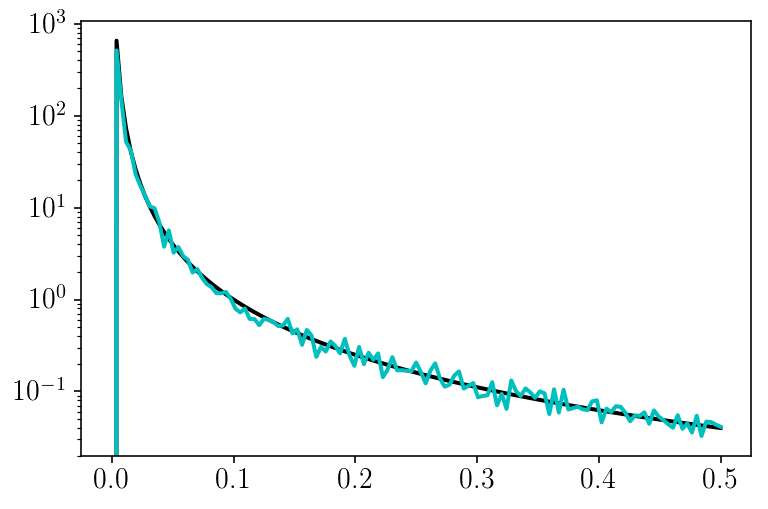

In [315]:
ndim = 256
ks = np.fft.rfftfreq(ndim)
powerspectrum = 0.01*ks**-2.
powerspectrum[ks == 0] = 0
k = ks.size

plt.plot(ks, powerspectrum)

n_repeat = 40
measpowerspectrum = 0*powerspectrum
for i in range(n_repeat):
    y_fft = draw_gaussian_field(powerspectrum)
    measpowerspectrum += np.abs(y_fft)**2 / n_repeat
    
plt.plot(ks, measpowerspectrum)

plt.yscale('log')

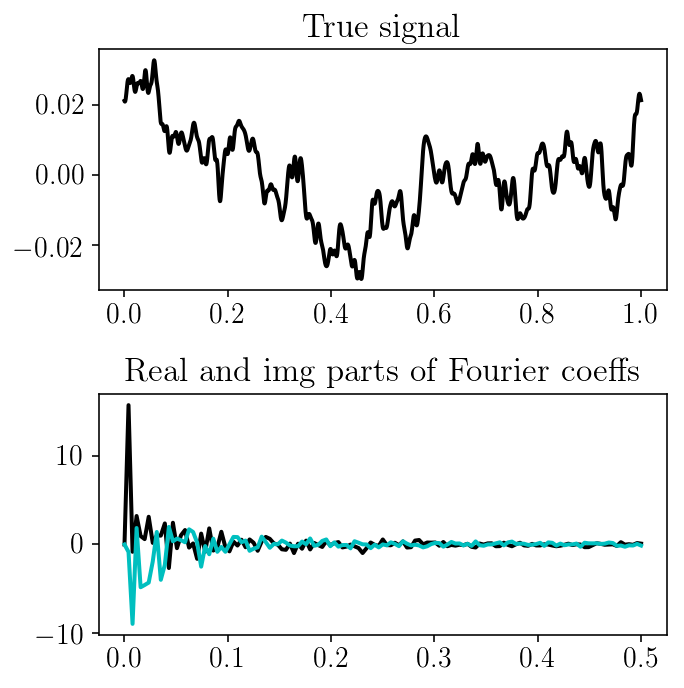

In [316]:
nrec = 10*ndim
x_grid = np.linspace(0, 1, nrec)
y_grid = np.fft.irfft(y_fft, nrec)  # Reconstruct signal, with zero padding.

# Plot the true signals and the noisy data!
fig, axs = plt.subplots(2, 1, figsize=(5, 5))
axs[0].set_title('True signal')
axs[0].plot(x_grid, y_grid)
axs[1].set_title('Real and img parts of Fourier coeffs')
axs[1].plot(ks, y_fft.real)
axs[1].plot(ks, y_fft.imag)
fig.tight_layout()

(array([  91.,  165.,  260.,  388.,  411.,  594.,  390.,   72.,  118.,   71.]),
 array([-0.02961671, -0.02338718, -0.01715765, -0.01092812, -0.00469859,
         0.00153093,  0.00776046,  0.01398999,  0.02021952,  0.02644905,
         0.03267857]),
 <a list of 10 Patch objects>)

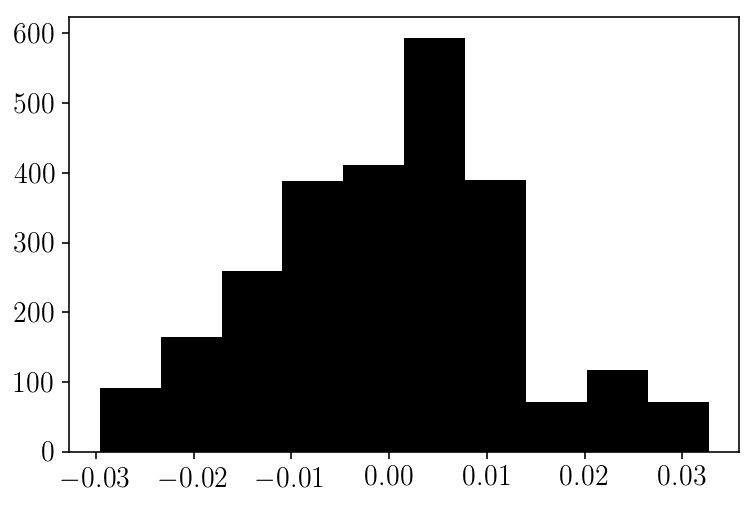

In [317]:
plt.hist(y_grid)

In [594]:
from scipy.stats import chi2

n_realizations = 1000
n_modes = 10

fields1 = np.zeros((n_realizations, nrec))
fields2 = np.zeros((n_realizations, nrec))
powerspectra1 = np.zeros((n_realizations, k))
powerspectra2 = np.zeros((n_realizations, k))
for i in range(n_realizations):
    for j in range(n_modes):
        y_fft_input = draw_gaussian_field(powerspectrum)
        #field = np.fft.irfft(y_fft_input, nrec)
        #y_fft_transformed = np.fft.rfft(field)[:k]
        powerspectra1[i, :] += np.abs(y_fft_input)**2 / n_modes
        
    
    #powerspectrum2 = truncnorm.rvs(0, 1e4*powerspectrum, loc=powerspectrum, 
    #                               scale=np.sqrt(2)*powerspectrum, size=powerspectrum.size, random_state=i)
    powerspectra2[i, :] = np.random.randn(powerspectrum.size)*np.sqrt(1/n_modes)*powerspectrum + powerspectrum
    #while np.sum(powerspectrum2 < 0) > 0:
    #    ind = powerspectrum2 < 0
    #    powerspectrum2[ind] = np.random.randn(ind.sum())*np.sqrt(2)*powerspectrum[ind] + powerspectrum[ind]
    
    #mag = rayleigh.rvs(scale=powerspectrum**0.5/np.sqrt(2), size=powerspectrum.size, random_state=10*i)
    #powerspectrum2 = mag**2
    
    #powerspectrum2 = chi2.rvs(2, scale=powerspectrum/2, size=powerspectrum.size)
    #powerspectra2r[i, :] = powerspectrum2
    
    #y_fft_input2 = draw_gaussian_field_fixedPS(powerspectrum2)
    #fields2[i, :] = np.fft.irfft(y_fft_input2, nrec)
    #y_fft_transformed2 = np.fft.rfft(fields2[i, :])[:k]
    #powerspectra2[i, :] = np.abs(y_fft_transformed2)**2

/Users/bl/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in true_divide
/Users/bl/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in true_divide


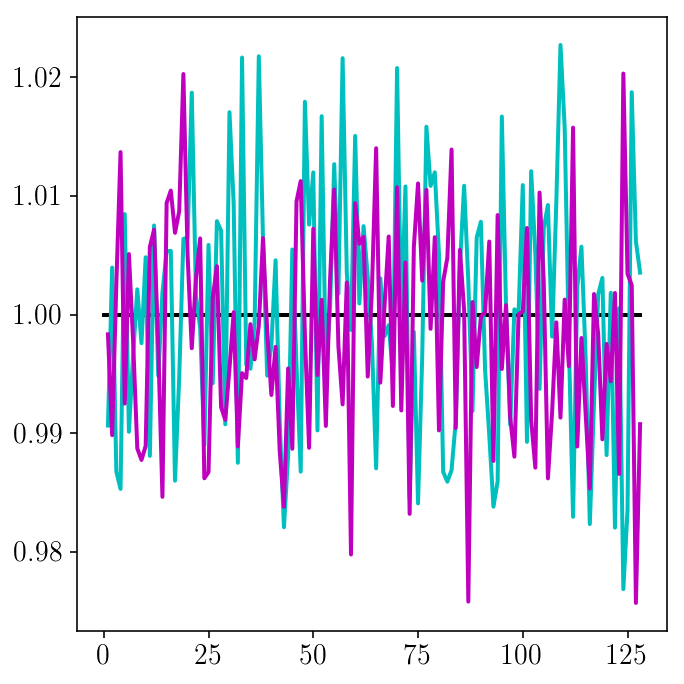

In [595]:
# Plot the true signals and the noisy data!
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.plot(powerspectrum*0+1)
ax.plot(powerspectra1.mean(axis=0)/powerspectrum)
ax.plot(powerspectra2.mean(axis=0)/powerspectrum)
#ax.plot(powerspectra1r.mean(axis=0)/powerspectrum)
#ax.plot(powerspectra2r.mean(axis=0)/powerspectrum)
#ax.set_yscale('log')
fig.tight_layout()

/Users/bl/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in true_divide
/Users/bl/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in true_divide


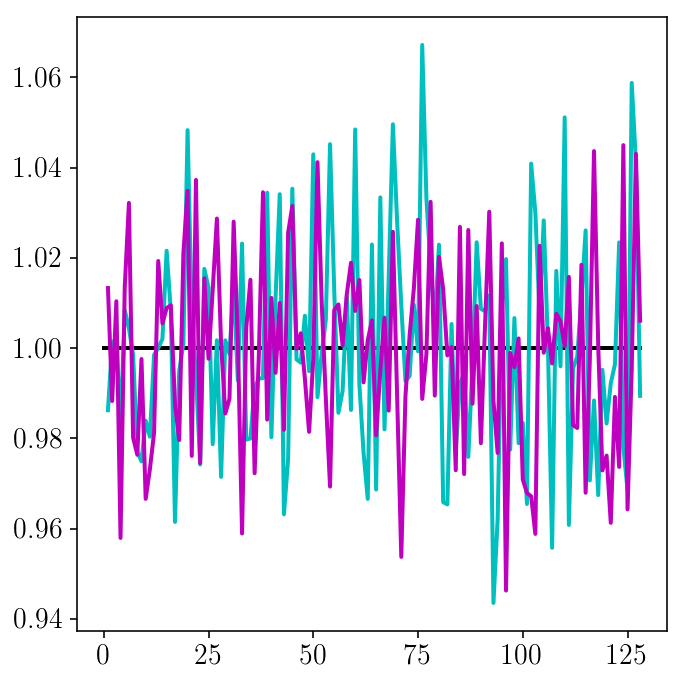

In [596]:
# Plot the true signals and the noisy data!
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.plot(powerspectrum*0+1)
ax.plot(powerspectra1.std(axis=0)/powerspectrum*np.sqrt(n_modes))
ax.plot(powerspectra2.std(axis=0)/powerspectrum*np.sqrt(n_modes))
#ax.set_yscale('log')
fig.tight_layout()

1.01915004214e-20 0.0170714343855


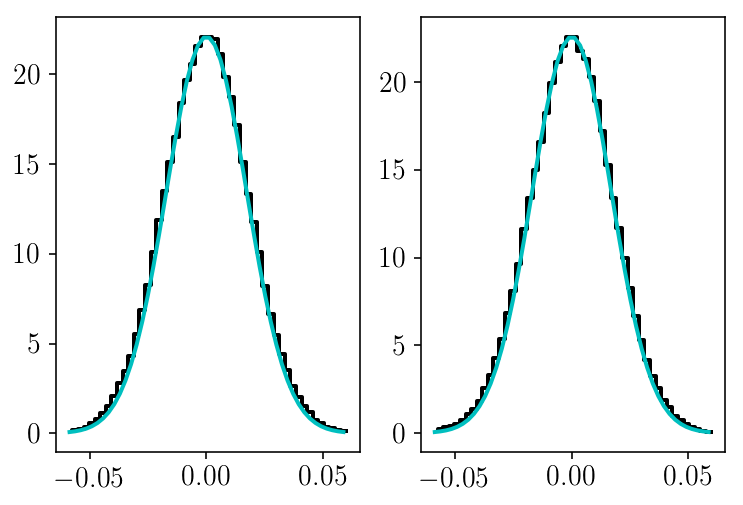

In [321]:
rr = [-0.06, 0.06]#[np.min(fields1), np.max(fields1)]
nbins = 50
fig, axs = plt.subplots(1, 2)
_, bins_e = np.histogram(fields1[0, :], bins=nbins, range=rr, normed=True)
bins_c = (bins_e[1:]+bins_e[:-1])/2
hists1 = np.array([np.histogram(fields1[i, :], bins=nbins, range=rr, normed=True)[0] for i in range(n_realizations)]).reshape((n_realizations, -1))
axs[0].plot(bins_e[1:], hists1.mean(axis=0), ls='steps')
hists2 = np.array([np.histogram(fields2[i, :], bins=nbins, range=rr, normed=True)[0] for i in range(n_realizations)]).reshape((n_realizations, -1))
axs[1].plot(bins_e[1:], hists2.mean(axis=0), ls='steps')
mean = np.mean([np.mean(fields1[i, :]) for i in range(n_realizations)])
sig = np.mean([np.std(fields1[i, :]) for i in range(n_realizations)])
axs[0].plot(bins_c, np.max(hists1.mean(axis=0))*np.exp(-0.5*((bins_c - mean)/sig)**2))
mean = np.mean([np.mean(fields2[i, :]) for i in range(n_realizations)])
sig = np.mean([np.std(fields2[i, :]) for i in range(n_realizations)])
axs[1].plot(bins_c, np.max(hists2.mean(axis=0))*np.exp(-0.5*((bins_c - mean)/sig)**2))
print(mean, sig)

In [326]:
def draw_correlated_gaussian_field(powespec, N, beta):
    k = powespec.size
    cov = np.diag(np.repeat(1 - beta, N)) + beta
    comp = np.zeros((k, N), dtype=np.complex)
    mu = np.repeat(0, N)
    #if k % 2 == 1:  
    #    comp.real[0, :] = np.sqrt(powespec[0]) * np.random.multivariate_normal(mu, cov, 1)
    #    comp.real[-1, :] = np.sqrt(powespec[-1]) * np.random.multivariate_normal(mu, cov, 1)
    #    comp.real[1:-1, :] = np.sqrt(powespec[1:-1] / 2)[:, None] * np.random.multivariate_normal(mu, cov, k-2)
    #    comp.imag[1:-1, :] = np.sqrt(powespec[1:-1] / 2)[:, None] * np.random.multivariate_normal(mu, cov, k-2)
    #if k % 2 == 0:  
    comp.real[0, :] = np.sqrt(powespec[0]) * np.random.multivariate_normal(mu, cov, 1)
    comp.real[1:, :] = np.sqrt(powespec[1:] / 2)[:, None] * np.random.multivariate_normal(mu, cov, k-1)
    comp.imag[1:, :] = np.sqrt(powespec[1:] / 2)[:, None] * np.random.multivariate_normal(mu, cov, k-1)
    return comp.T

Ncorr = 3
beta = 0.5 * -1 / (Ncorr - 1)
test = draw_correlated_gaussian_field(powerspectrum, Ncorr, beta)
print(test.shape)

(3, 129)


In [375]:
def mapping(arr):
    return arr

n_repeat = 10
n_realizations = 100
Ncorr = 2
if Ncorr == 1:
    beta = 0
else:
    beta = 0.9 * -1 / (Ncorr - 1)

def correlated_packets(n_repeat, n_realizations, Ncorr, beta):
    y_fft_withbeta = np.zeros((n_repeat, n_realizations, Ncorr, k), dtype=complex)
    for j in range(n_repeat):
        for i in range(n_realizations):
            y_fft_input = draw_correlated_gaussian_field(powerspectrum, Ncorr, beta)
            fields = mapping(np.fft.irfft(y_fft_input, nrec))
            y_fft_withbeta[j, i, :, :] = np.fft.rfft(fields)[:, :k]
    return y_fft_withbeta

y_fft_nobeta = correlated_packets(n_repeat, n_realizations, Ncorr, 0)
y_fft_withbeta = correlated_packets(n_repeat, n_realizations, Ncorr, beta)
meanfield_nobeta = np.mean(y_fft_nobeta, axis=(1, 2))
meanfield_withbeta = np.mean(y_fft_withbeta, axis=(1, 2))

/Users/bl/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app
/Users/bl/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app
/Users/bl/anaconda/lib/python3.5/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/bl/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()
/Users/bl/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


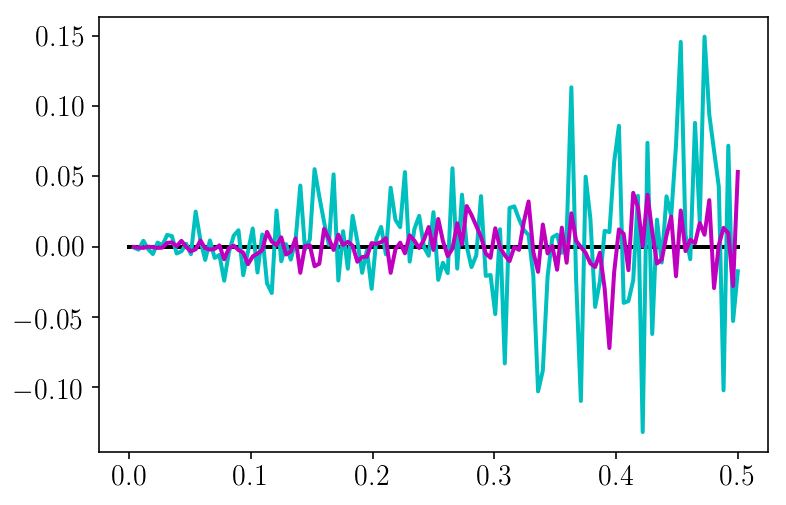

In [376]:
plt.plot(ks, 0*powerspectrum)
plt.plot(ks, meanfield_nobeta.mean(axis=0)/powerspectrum)
plt.plot(ks, meanfield_withbeta.mean(axis=0)/powerspectrum)

/Users/bl/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':
/Users/bl/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app


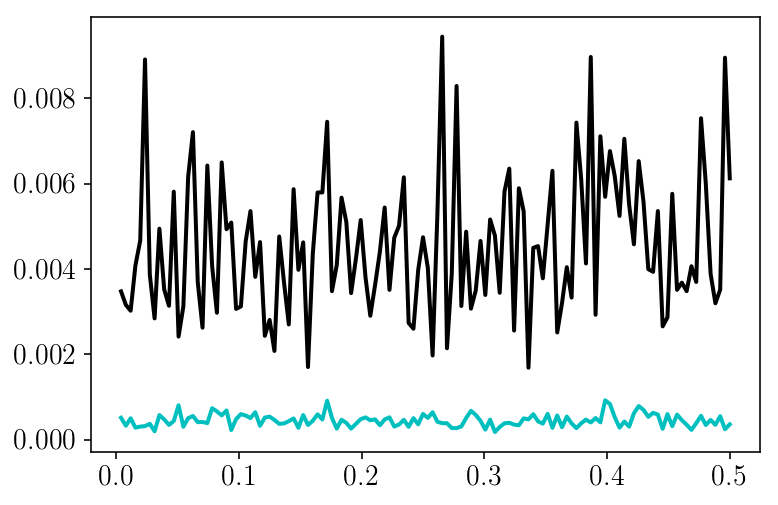

In [378]:
plt.plot(ks, meanfield_nobeta.var(axis=0)/powerspectrum)
plt.plot(ks, meanfield_withbeta.var(axis=0)/powerspectrum)

[[ 1.          0.        ]
 [ 0.88207939  1.        ]] -0.9


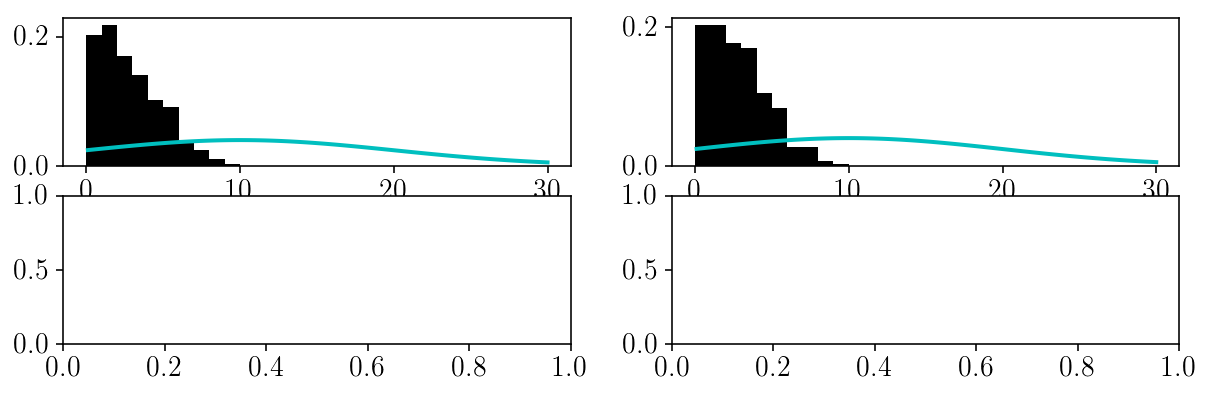

In [601]:
num = 1000
Ncorr = 2
beta = 0.9 * -1/(Ncorr - 1)

def correlated_truncnorm(num, N, var, beta):
    rho = np.abs(beta)**0.5
    mu = np.repeat(0, N)
    cov = np.diag(np.repeat(1 - rho, N)) + rho
    xs = np.random.multivariate_normal(mu, cov*var, num)
    ind = np.min(xs, axis=1) > 0
    return xs[ind, :].reshape((ind.sum(), N))

ys = correlated_truncnorm(num, Ncorr, var, beta)
corrmat = np.corrcoef(ys.T)
print(np.tril(corrmat), beta)

var = 10
rep = 1

bins = np.linspace(0.1, 3*var, 100)
fig, axs = plt.subplots(2, 2, figsize=(10, 3))
axs = axs.ravel()
for i in range(Ncorr):
    axs[i].hist(ys[:, i], 30, range=[0, 3*var], normed=True)
    axs[i].plot(bins, truncnorm.pdf(bins, a=-var, b=bins[-1], loc=var, scale=var/np.sqrt(rep)))


In [548]:
?truncnorm.rvs

5.10162933051 2.25394513076


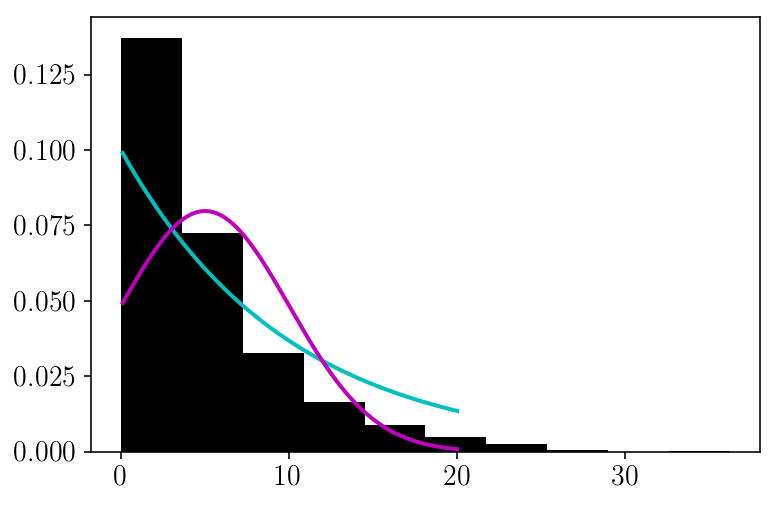

In [566]:
from scipy.stats import norm
var = 5
num = 1000
bins = np.linspace(0.1, var*4, 200)

#plt.plot(bins, rayleigh.pdf(bins, scale=var))
#plt.plot(bins, chi2.pdf(bins, df=2, scale=var))
rep = 1
xs = (var/2)**0.5 * (np.random.randn(num, rep) + 1j*np.random.randn(num, rep))
plt.hist(np.mean(np.absolute(xs)**2., axis=1), normed=True)
plt.plot(bins, chi2.pdf(bins, df=2, scale=var))
plt.plot(bins, truncnorm.pdf(bins, a=-var, b=bins[-1], loc=var, scale=var/np.sqrt(rep)))
#plt.plot(bins, norm.pdf(bins, loc=var, scale=var/np.sqrt(rep)))
xs2 = rayleigh.rvs(size=num, scale=var**0.5)
#plt.hist(xs**2., normed=True)
print(xs.var(), xs2.var())

In [526]:
rely on averaging of modes to get (truncated) gaussian distribution for Pk_obs=\sum abs(y)^2
so that I can draw Pk_obs easily without causing extra variance.

In [702]:
def mapping(arr):
    return arr

n_realizations = 100
n_modes = 10
Ncorr = 2
beta = 0.999 * -1 / (Ncorr - 1)


def correlated_truncnorm(num, N, n_modes, powerspectrum, beta):
    mu = np.repeat(0, N)
    cov = np.diag(np.repeat(1 - beta, N)) + beta
    xs = np.zeros((num, N, powerspectrum.size))
    for ik, pk in enumerate(powerspectrum):
        if ik > 0:
            x = np.zeros((num, N))
            ind = np.min(x, axis=1) <= 0
            while ind.sum() > 0:
                x[ind, :] = np.random.multivariate_normal(np.repeat(pk, Ncorr), cov * pk**2 / n_modes, ind.sum())
                ind = np.min(x, axis=1) <= 0
            xs[:, :, ik] = x
    return xs

powerspectra_nobeta1 = np.zeros((n_realizations, Ncorr, k))
powerspectra_nobeta2 = np.zeros((n_realizations, Ncorr, k))
powerspectra_withbeta = np.zeros((n_realizations, Ncorr, k))

powerspectra_i_nobeta = correlated_truncnorm(n_realizations, Ncorr, n_modes, powerspectrum, 0)
powerspectra_i_withbeta = correlated_truncnorm(n_realizations, Ncorr, n_modes, powerspectrum, beta)

for i in range(n_realizations):
    
    for j in range(Ncorr):
        
        for m in range(n_modes):
            y_fft_input = draw_gaussian_field(powerspectrum)
            y_fft_transformed = np.fft.rfft(mapping(np.fft.irfft(y_fft_input, nrec)))[:k]
            powerspectra_nobeta1[i, j, :] += np.abs(y_fft_transformed)**2 / n_modes
        
        y_fft_input2 = draw_gaussian_field_fixedPS(powerspectra_i_nobeta[i, j, :])
        y_fft_transformed2 = np.fft.rfft(mapping(np.fft.irfft(y_fft_input2, nrec)))[:k]
        powerspectra_nobeta2[i, j, :] = np.abs(y_fft_transformed2)**2
        
        y_fft_input2 = draw_gaussian_field_fixedPS(powerspectra_i_withbeta[i, j, :])
        y_fft_transformed2 = np.fft.rfft(mapping(np.fft.irfft(y_fft_input2, nrec)))[:k]
        powerspectra_withbeta[i, j, :] = np.abs(y_fft_transformed2)**2

/Users/bl/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()
/Users/bl/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in true_divide
/Users/bl/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in true_divide


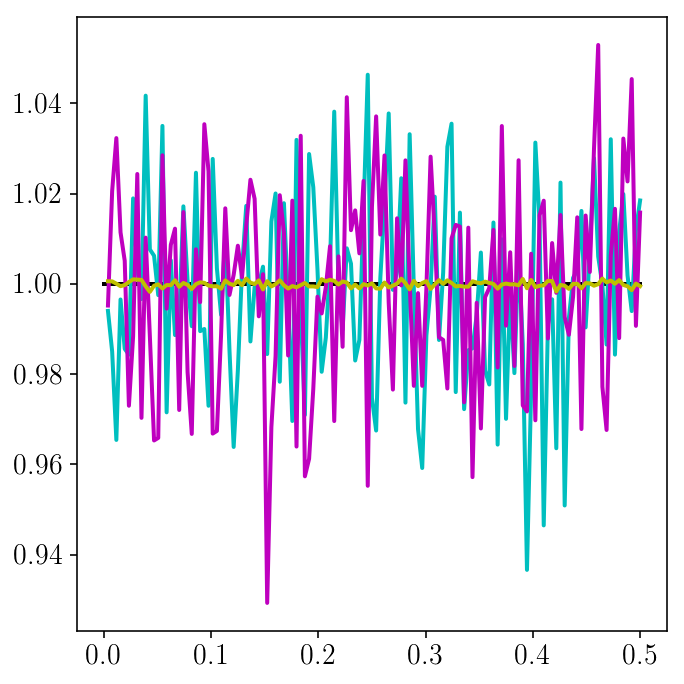

In [703]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.plot(ks, powerspectrum*0+1)
ax.plot(ks, powerspectra_nobeta1.mean(axis=(0, 1))/powerspectrum)
ax.plot(ks, powerspectra_i_nobeta.mean(axis=(0, 1))/powerspectrum)
ax.plot(ks, powerspectra_i_withbeta.mean(axis=(0, 1))/powerspectrum)
fig.tight_layout()

/Users/bl/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()
/Users/bl/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in true_divide
/Users/bl/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in true_divide


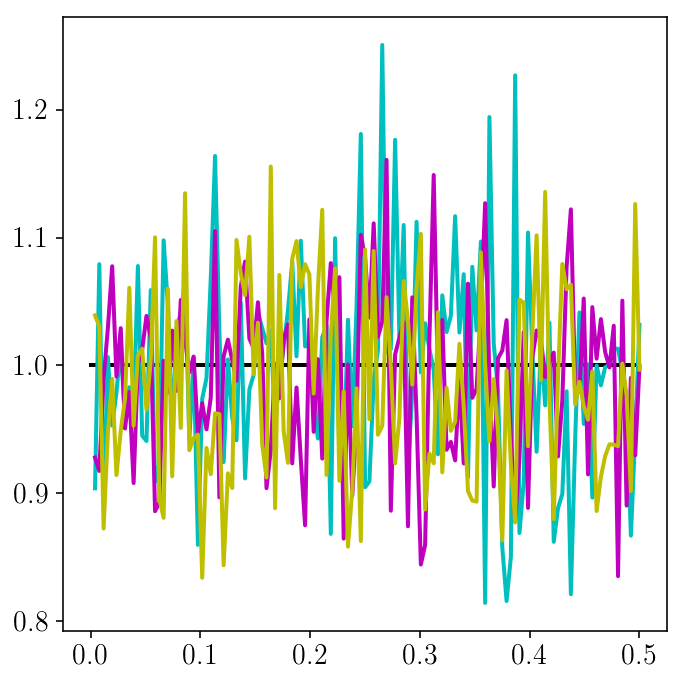

In [715]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.plot(ks, powerspectrum*0+1)
ax.plot(ks, powerspectra_nobeta1.mean(axis=1).std(axis=0)/powerspectrum*np.sqrt(n_modes*Ncorr))
ax.plot(ks, powerspectra_i_nobeta.mean(axis=1).std(axis=0)/powerspectrum*np.sqrt(n_modes*Ncorr))
ax.plot(ks, powerspectra_i_withbeta.mean(axis=1).std(axis=0)/powerspectrum*np.sqrt(n_modes*Ncorr)/(1+beta)**0.5)
fig.tight_layout()

In [716]:
np.std(powerspectra_nobeta1.mean(axis=1).std(axis=0)[1:]/powerspectrum[1:]*np.sqrt(n_modes*Ncorr)), np.std(powerspectra_i_withbeta.mean(axis=1).std(axis=0)[1:]/powerspectrum[1:]*np.sqrt(n_modes*Ncorr)/(1+beta)**0.5)

(0.080337407176003073, 0.073495785093630986)

In [379]:
n_realizations = [10, 40, 80, 160, 320]

n_repeat = 2
Ncorr = 2
beta = 0.5 * -1 / (Ncorr - 1)
    
meanvarianceratio_nobeta = np.zeros(len(n_realizations))
meanvarianceratio_withbeta = np.zeros(len(n_realizations))
for i in range(len(n_realizations)):
    y_fft_nobeta = correlated_packets(n_repeat, n_realizations[i], Ncorr, 0)
    y_fft_withbeta = correlated_packets(n_repeat, n_realizations[i], Ncorr, beta)
    meanfield_nobeta = np.mean(y_fft_nobeta, axis=(1, 2))
    meanfield_withbeta = np.mean(y_fft_withbeta, axis=(1, 2))
    meanvarianceratio_nobeta[i] = np.mean(meanfield_nobeta.std(axis=0)[1:] / powerspectrum[1:]**2)
    meanvarianceratio_withbeta[i] = np.mean(meanfield_withbeta.std(axis=0)[1:] / powerspectrum[1:]**2)

[ 19.43490049  24.12171888  17.96807628  18.47876613  20.04518051]
[ 32.44671679  29.01170823  28.83858939  27.15886496  27.68387922]


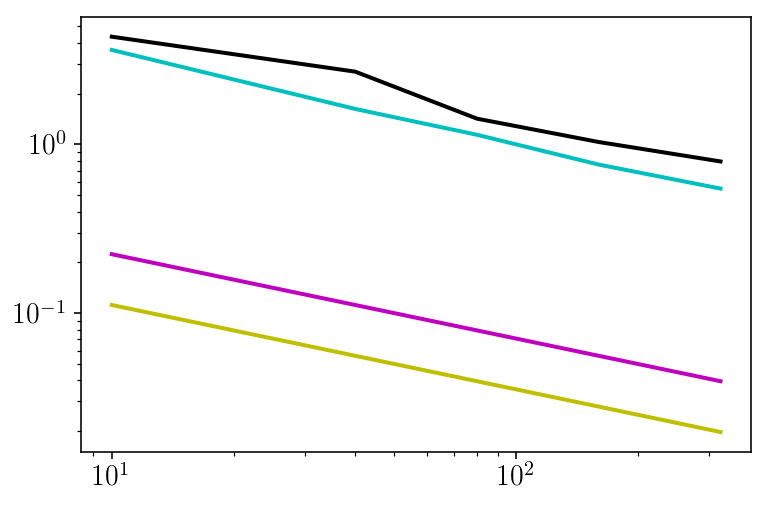

In [385]:
model_nobeta = 1 / np.sqrt(Ncorr*np.array(n_realizations))
model_withbeta = (1 + (Ncorr-1)*beta) / np.sqrt(Ncorr*np.array(n_realizations))
plt.plot(n_realizations, meanvarianceratio_nobeta)
plt.plot(n_realizations, meanvarianceratio_withbeta)
plt.plot(n_realizations, model_nobeta)
plt.plot(n_realizations, model_withbeta)
print(meanvarianceratio_nobeta/model_nobeta)
print(meanvarianceratio_withbeta/model_withbeta)
plt.xscale('log')
plt.yscale('log')

In [12]:
Mean: draw N packets of K correlated Fourier modes. Measure pk, average in packets, 
    then use sample mean estimator. Compare scaling with N*K function of beta.

SyntaxError: invalid syntax (<ipython-input-12-e3f69be69b34>, line 1)

In [ ]:
Covariance estimator : draw N packets of K correlated pk, generate and transform field, 
    average observed pk in packets, then use sample covariance. Compare scaling with N*K function of beta.